# TaxonomyLLM: Enhancing Data Classification with LLMs

This notebook is detailed exploration of TaxonomyLLM, a cutting-edge approach to automating taxonomy generation using large language models (LLMs). In this notebook, we delve into the complexities and innovations of TaxonomyLLM, showcasing its significant role in transforming data classification in big data environments.

## Business Value of Automated Taxonomy
In today's data-driven world, efficiently organizing and classifying large volumes of data is crucial. Manual taxonomy generation is time-consuming and prone to errors, making it unscalable in large data environments. TaxonomyLLM addresses these challenges by automating the process, ensuring:
- **Efficiency:** Rapidly processes vast datasets.
- **Accuracy:** Reduces human error in data tagging.
- **Scalability:** Adapts to growing data without additional manual effort.

This notebook will guide you through the theoretical concepts, practical implementation, and the impressive potential of TaxonomyLLM in the realm of data science and artificial intelligence.


## Theoretical Background and Concepts

### Understanding Large Language Models (LLMs)
LLMs have revolutionized the way we process language data. They are designed to understand, generate, and interpret human language in a way that is both contextually relevant and meaningful.

#### Mathematical Abstractions in LLMs
- **Vector Spaces:** LLMs represent words and phrases as vectors in high-dimensional spaces.
- **Neural Network Architectures:** Discuss architectures like transformers that are pivotal in LLMs.
- **Attention Mechanisms:** Explain how attention mechanisms help LLMs focus on relevant parts of the input data.

### Topological Attention Mechanisms
These mechanisms are crucial for understanding the relationships and structures within data. They enable LLMs to disentangle complex data patterns and extract meaningful taxonomy tags.

#### Diagram: LLM Architecture

<img src="design.png" alt="Image Description" width="500" height="500">

### Relevance in Automated Taxonomy Generation
Automated taxonomy generation with LLMs bridges the gap between unstructured data and structured classification, making it a pivotal tool in data management.

### Neural network

<img src="taxonomy_neural_network.png" alt="Image Description" width="500" height="500">


- **Input Data**: Represents the input SQL text.
- **Embedding Layer**: Corresponds to the embedding layer within the `SchemaEncoder`.
- **Flatten Layer**: Corresponds to the flatten layer within the `SchemaEncoder`.
- **RDF Generation**: Represents the `TaxonomyDecoder` layer responsible for generating RDF data.


## 3. Project Setup and Dependencies

In [1]:
# Project Setup and Dependencies
import os
import random
import tensorflow as tf
from tensorflow.keras.layers import Layer, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from rdflib import Namespace, Graph, URIRef, Literal
from io import StringIO

# Environment setup
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Display TensorFlow version for reference
print("TensorFlow version:", tf.__version__)


2024-01-21 15:03:51.175050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.15.0


## 4. Parsing SQL Schema

In [2]:
# Parsing the SQL Schema
sql_text = """
CREATE TABLE Products (
    id INTEGER PRIMARY KEY,
    name TEXT, 
    category TEXT,
    price DECIMAL  
);
"""

# Extracting column names
columns = [line.split()[0] for line in sql_text.split('\n') if line.strip() and line.strip().split()[0] in ['id', 'name', 'category', 'price']]

# Display extracted columns
print("Extracted Columns:", columns)


Extracted Columns: ['id', 'name', 'category', 'price']


## 5. Schema Encoding and Mathematical Concepts

### Mathematical Explanation of Embeddings in SchemaEncoder

### What are Embeddings?

Embeddings are a type of representation that maps discrete, categorical data, such as words in text, into vectors of real numbers. This is crucial in the field of machine learning, particularly when dealing with types of data that are not inherently numerical.

In the context of TaxonomyLLM, embeddings are used to convert components of an SQL schema into a numerical format. This allows the subsequent neural network layers to process and learn from these data.

### Mathematical Representation of Embeddings

Consider a vocabulary $V$ of size $N$, where each word (or in our case, schema component) is represented by a unique integer in the range $[1, N]$. An embedding is then a function $f: V \rightarrow \mathbb{R}^d$, where $d$ is the dimensionality of the embedding space. This function maps each word to a $d$-dimensional vector.

### Embedding Matrix

The embeddings for all words in the vocabulary are stored in a matrix $E$ of size $N \times d$, where each row $i$ of the matrix corresponds to the $d$-dimensional embedding of the $i$-th word in the vocabulary.

If the integer representation of a word is given by $w_i$, its embedding is found by:

$$ \text{Embedding of } w_i = E_{w_i} $$

### Transforming Categorical Data into Numerical Format

In our SQL schema example, each component of the schema (like 'id', 'name', 'category', 'price') is first assigned a unique integer. These integers are then used to look up the corresponding embeddings in the embedding matrix $E$.

For a given schema component $c$, its integer representation $w_c$ is used to fetch its embedding:

$$ \text{Numerical Representation of } c = E_{w_c} $$

This process effectively transforms the categorical schema components into a format that neural network models can process, enabling them to learn and make predictions based on this data.

### Importance in Neural Networks

Embeddings are particularly important in neural network models because they allow these models to capture more information about the data, such as relationships and similarities between different schema components. By learning dense representations in a high-dimensional space, neural networks can discern subtle patterns and correlations in the data, which would be difficult or impossible to capture using traditional one-hot encoding methods.

### Conclusion

In summary, embeddings are a powerful tool in machine learning, providing a way to convert categorical data into a rich, numerical format suitable for processing by neural networks. In TaxonomyLLM's `SchemaEncoder`, embeddings play a crucial role in enabling the model to effectively learn from and make predictions based on SQL schema data.


In [3]:
# Schema Encoding and Mathematical Foundations
class SchemaEncoder(Layer):
    def __init__(self):
        super(SchemaEncoder, self).__init__()
        self.embedding = Embedding(1000, 32)
        self.flatten = Flatten()

    def call(self, seq):
        x = self.embedding(seq)
        return self.flatten(x)



## 6. Taxonomy Generation with RDF

## Explanation of RDF Generation

### Understanding RDF in the Context of Relational Data

The Resource Description Framework (RDF) is a standard for representing information about resources in the World Wide Web. RDF fundamentally represents information in the form of statements about resources, expressed as a triple structure comprising a subject, predicate, and object.

#### Mathematical Representation of RDF

RDF can be mathematically thought of as a set of triples, each of which is an ordered tuple \( (s, p, o) \), where:
- \( s \) is the subject, representing the resource from which a property emanates.
- \( p \) is the predicate, representing the property or relationship between the subject and the object.
- \( o \) is the object, representing the resource or value that is linked to the subject.

In formal terms, if we have a set of subjects \( S \), a set of predicates \( P \), and a set of objects \( O \), an RDF triple is an element of the Cartesian product \( S \times P \times O \).

### Significance of Each Component

- **Subject (s):** The subject in an RDF triple is the 'thing' or resource about which a statement is made. It can be an entity, a concept, or anything identifiable in the domain of discourse.

- **Predicate (p):** The predicate denotes characteristics of the resource or a relationship between the subject and object. Predicates define the type of interaction or the nature of the association between the subject and object.

- **Object (o):** The object is the value of the property or the resource that is in relation with the subject. It can be another resource or a literal value (like a string, number, date, etc.).

### RDF and Relational Data

In the context of relational data, such as an SQL schema, RDF provides a flexible way to represent the relationships and attributes of the data. For instance, each column in a database table can be a subject, with predicates describing its characteristics (like data type, constraints) and the relationships with other entities.

### Diagrams Illustrating RDF Triples

To illustrate, consider a simple RDF representation of a database table named 'Products':

- Subject: Product ID (e.g., 'Product123')
- Predicate: 'hasName'
- Object: 'Gadget Pro'

This can be visually represented as:

```
[Product123] -- hasName --> ['Gadget Pro']
```

Similarly, other properties and relationships can be represented, forming a network of interconnected RDF triples that comprehensively describe the schema and its data.

### Mathematical Foundation in RDF Generation

The process of generating RDF from a relational schema involves mapping the elements of the database (tables, columns, rows) into RDF triples. This involves a series of functions that translate the relational schema components into the RDF format. The mathematical abstraction here can be viewed as a transformation function:

\[ f: (Database Schema) \rightarrow (RDF Triples) \]

This function takes the components of the database schema as input and outputs a set of RDF triples representing the schema's structure and relationships.

### Conclusion

RDF provides a robust and flexible framework for representing relational data, especially in contexts where the relationships and attributes of the data need to be described in a machine-readable format. In the realm of machine learning and AI, such as in the TaxonomyLLM project, understanding and generating RDF is crucial for effectively processing and interpreting relational data structures.


In [4]:
# Taxonomy Generation with RDF
class TaxonomyDecoder(Layer):
    def call(self, vectors):
        return tf.py_function(func=generate_rdf, inp=[vectors], Tout=tf.string)

def generate_rdf(vectors):
    graph = Graph()
    base_uri = "http://gonnect.org/"
    uri = Namespace(base_uri)

    for i, column in enumerate(columns):
        subject = URIRef(f"{base_uri}{column}")
        predicate = URIRef(f"{base_uri}hasDataType")
        object = URIRef(f"{base_uri}{random.choice(['INTEGER', 'TEXT', 'DECIMAL'])}")
        graph.add((subject, predicate, object))
        graph.add((subject, uri.label, Literal(f"Column: {column}")))
        graph.add((predicate, uri.label, Literal("has data type")))
        graph.add((object, uri.label, Literal(f"Data Type: {object.split('/')[-1]}")))

    return graph.serialize(format="ttl").encode('utf8')




## 7. Results Visualization

### Visualization of RDF Triples

To better understand the structure and relationships defined by RDF triples, a visual representation can be extremely helpful. Below is a diagram illustrating the RDF triples derived from our SQL schema example.

![RDF Triples Visualization](rdf_generated.png)

*Figure: An illustrative diagram showing RDF triples, with each node representing a subject, predicate, or object, and the edges representing the relationships between them.*

In this visualization:
- Each **node** represents either a subject, predicate, or object.
- Each **directed edge** indicates the relationship from subject to object through a predicate.

This graphical representation aids in comprehensively understanding the complex interrelations within RDF data, which is especially useful in large-scale data environments.


In [5]:
# Results Visualization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([sql_text])
sql_seq = tokenizer.texts_to_sequences([sql_text])[0]
sql_seq = tf.expand_dims(sql_seq, 0)

encoder = SchemaEncoder()
vectors = encoder(sql_seq)

decoder = TaxonomyDecoder()
rdf_graph_serialized = decoder(vectors)

# Display the generated RDF graph
print("Generated RDF Graph:\n" + rdf_graph_serialized.numpy().decode("utf-8"))




Generated RDF Graph:
@prefix ns1: <http://gonnect.org/> .

ns1:category ns1:hasDataType ns1:INTEGER ;
    ns1:label "Column: category" .

ns1:hasDataType ns1:label "has data type" .

ns1:id ns1:hasDataType ns1:TEXT ;
    ns1:label "Column: id" .

ns1:name ns1:hasDataType ns1:DECIMAL ;
    ns1:label "Column: name" .

ns1:price ns1:hasDataType ns1:DECIMAL ;
    ns1:label "Column: price" .

ns1:INTEGER ns1:label "Data Type: INTEGER" .

ns1:TEXT ns1:label "Data Type: TEXT" .

ns1:DECIMAL ns1:label "Data Type: DECIMAL" .


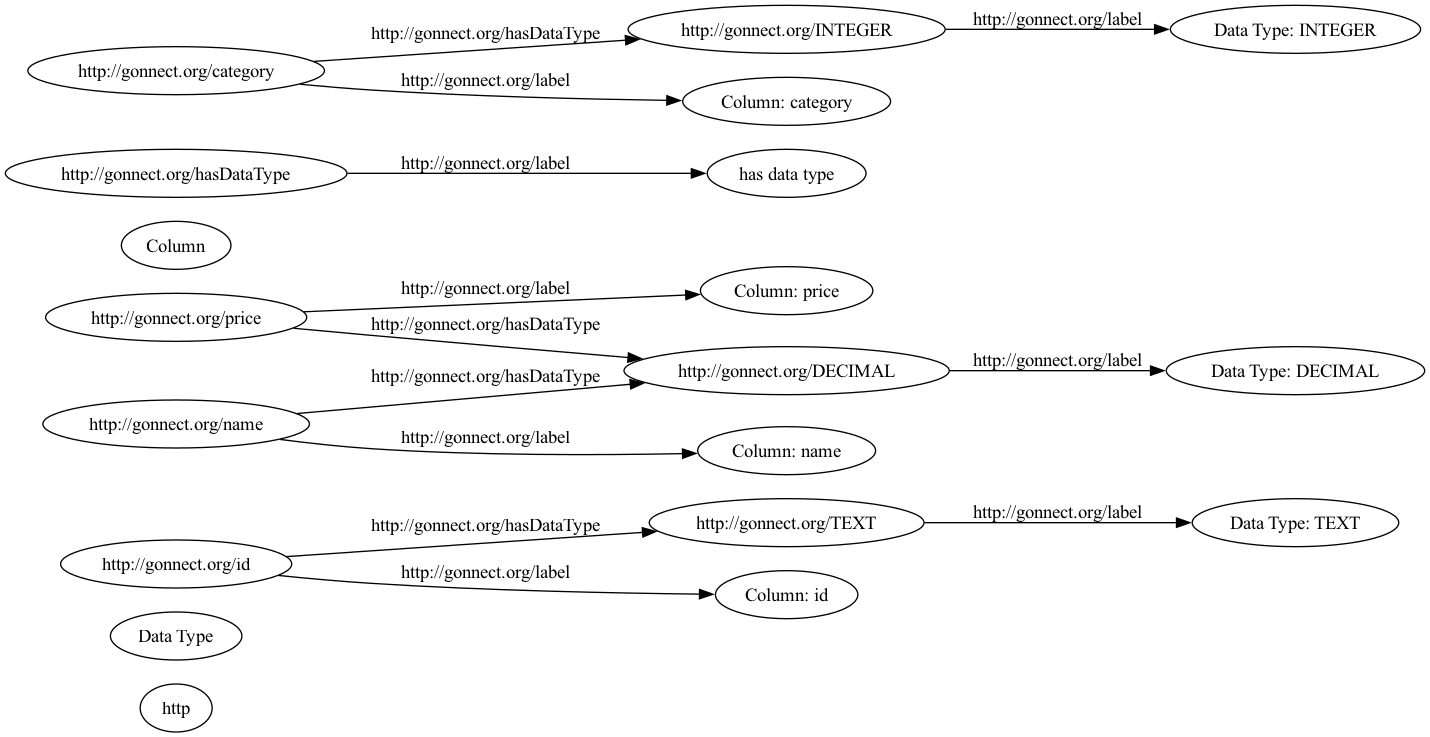

In [9]:
# Import the necessary libraries
from rdflib import Graph
from rdflib.tools import rdf2dot
import pydot
from IPython.display import Image

# Convert the TensorFlow EagerTensor to a string
rdf_graph_serialized_str = rdf_graph_serialized.numpy().decode("utf-8")

# Create an RDF graph and parse the serialized RDF data
g = Graph()
g.parse(data=rdf_graph_serialized_str, format='turtle')

# Create a pydot.Dot object from the RDF graph
dot = pydot.Dot()
dot.set('rankdir', 'LR')  # Set the direction of the graph (left to right)

# Iterate over RDF triples and add them to the pydot.Dot object
for subject, predicate, obj in g:
    dot.add_node(pydot.Node(subject))
    dot.add_node(pydot.Node(obj))
    dot.add_edge(pydot.Edge(subject, obj, label=predicate))

# Save the visualization to a file (you can change the file format if needed)
dot_file_path = 'rdf_visualization.png'
dot.write_png(dot_file_path)

# Display the visualization in the notebook
Image(dot_file_path)


## Discussion and Implications

TaxonomyLLM's approach opens up new avenues in data science and AI. By automating taxonomy generation, it finds applications in various domains like e-commerce, content management, and more. This section can delve into the potential impact of TaxonomyLLM across different industries, discussing its versatility and adaptability.

### Future Research Directions
- Expansion to more complex schemas.
- Integration with larger and more diverse datasets.
- Exploration of other neural network architectures for enhanced performance.


# Conclusion

In this notebook, we have explored TaxonomyLLM, a novel approach to automating taxonomy generation using LLMs. We have discussed its theoretical underpinnings, practical implementation, and potential impact on data management and AI. TaxonomyLLM represents a significant step forward in making data classification more efficient, accurate, and scalable.
